An important decision that farmers have to make during the growing season is decide the amount of nitrogen fertilizer that needs to be applied to the crop. Multiple factors contribute to this decision including the potential yield of the crop, the price of the harvestable part of the crop, the cost of nitrogen fertilizer, the current amount of nitrogen in the soil, and the nitrogen requirements of the crop.

The maximum return to nitrogen rate is one way to balance the estimated gross revenue and the cost of the input fertilizer. For this method to work, a yield response function to nitrogen is essential because it determines the amount of yield increase per unit input added to the crop, until a point where a new unit of nitrogen fertilizer does not produce gross revenue to pay for itself.

We will use the yield response function to nitrogen define in the previous exercise as an example. 

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Define inputs
grain_price = 0.17 # US$ per kg of grain
fertilizer_cost = 0.02 # US$ per kg of nitrogen
grain_fertilizer_ratio = grain_price/fertilizer_cost
print(grain_fertilizer_ratio)


8.5


In [3]:
# Define yield response function
def responsefn(nitrogen_input):
    beta_0 = 115.6
    beta_1 = 0.9613
    beta_2 = -0.003412
    x_critical = -beta_1/(2*beta_2)
    
    Y = []
    for N in nitrogen_input:
        if (N<x_critical):
            Y.append( beta_0 + beta_1*N + beta_2*N**2 )
        else:
            Y.append( beta_0 - beta_1**2/(4*beta_2) )

    return np.array(Y)


In [5]:
# Find maximum return to nitrogen
nitrogen_range = np.arange(200)
yield_range = responsefn(nitrogen_range)
gross_revenue = yield_range * grain_price
variable_costs = nitrogen_range * fertilizer_cost
net_revenue = gross_revenue - variable_costs
idx = np.argmax(net_revenue)

print(nitrogen_range[idx],'kg per hectare')


124 kg per hectare


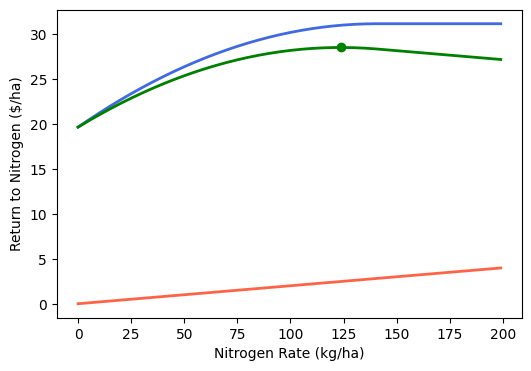

In [7]:
# Compute maximum nitrogen rate
plt.figure(figsize=(6,4))
plt.plot(nitrogen_range, gross_revenue, color='royalblue', linewidth=2)
plt.plot(nitrogen_range, variable_costs, color='tomato', linewidth=2)
plt.plot(nitrogen_range, net_revenue, color='green', linewidth=2)
plt.scatter(nitrogen_range[idx], net_revenue[idx], facecolor='green')
plt.xlabel('Nitrogen Rate (kg/ha)')
plt.ylabel('Return to Nitrogen ($/ha)')
plt.show()